In [4]:
import pandas as pd 
import numpy as np 


#from scikeras.wrappers import KerasClassifier
import seaborn as sn 
from seaborn import distplot
from seaborn import heatmap
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#import tensorflow as tf
from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
 
# Scikit-Learn imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


from google.colab import drive   # use if the dataset in your drive
drive.mount('/content/drive')

In [ ]:
# # flag_1=raw_data[raw_data['FLAG']==1]
# flag_2=raw_data[raw_data['FLAG']==0]

In [5]:
path = 'balance_data.csv'  
raw_data = pd.read_csv(path)
raw_data

,Unnamed: 0,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0,0387DD8A07E07FDA6271170F86AD9151,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,3,B32AC8CC6D5D805AC053557AB05F5343,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,4,EDFC78B07BA2908B3395C4EB2304665E,1,2.90,5.64,6.99,3.32,3.61,5.35,4.73,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7225,7225,C80C0A967166EDC265A32F0E6C79B768,0,0.40,1.10,0.89,0.90,0.94,1.93,0.55,...,0.43,2.03,0.34,0.26,1.41,0.38,1.54,1.39,1.50,1.42
7226,7226,A4F8D505DDA447CFFB0CB0D355FD379D,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7227,7227,2B891A7C4EDE71FF060CE6F53DFF242D,0,10.91,9.32,9.07,6.35,10.33,10.17,9.27,...,14.36,13.06,8.32,9.28,12.40,14.19,10.55,14.44,11.35,9.35
7228,7228,0A7F166D6A883A69F4C01FFDAA2D17B9,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [6]:
import pandas as pd 
import numpy as np 


In [9]:
# flag_2=flag_2[0:3615]


In [ ]:
# flag_2.shape

In [ ]:
# flag_1.shape

In [ ]:
# raw_data=pd.concat([flag_1,flag_2])

In [ ]:
# raw_data.to_csv("balance_data.csv")

<Axes: title={'center': 'count "Target"'}>

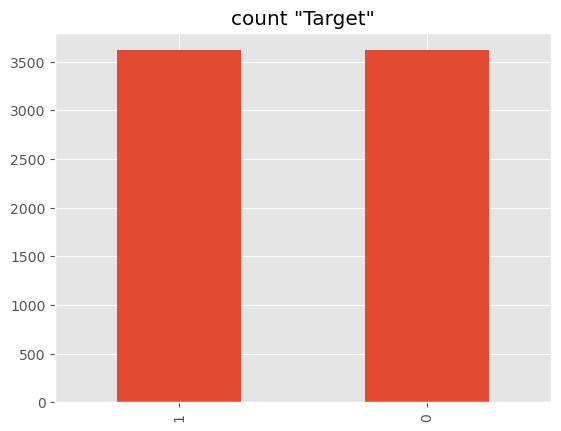

In [7]:
raw_data['FLAG'].value_counts().plot(kind='bar',title='count "Target"')


(7230, 1035)


<Axes: title={'center': 'count "Target"'}>

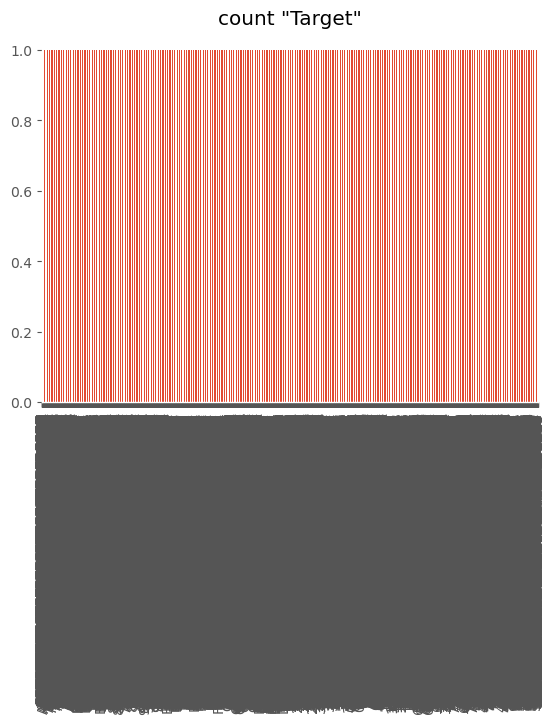

In [8]:
kWhs = raw_data.iloc[:, 2:]  #seperate the features and the label
labels = raw_data.iloc[:, 1]
print(kWhs.shape)
labels.shape



rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable

kWhs,labels=rus.fit_resample(kWhs,labels)
labels.value_counts().plot(kind='bar',title='count "Target"')


In [9]:
kWhs

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,1,22.23,22.46,20.13,21.79,24.00,24.00,19.10,15.91,21.52,...,24.20,18.89,3.96,19.54,19.32,37.87,26.44,9.49,14.28,22.83
1,0,19.79,20.73,21.36,21.69,20.65,19.59,20.01,18.35,20.53,...,25.43,22.40,18.17,19.86,17.39,19.61,20.55,23.48,19.78,19.33
2,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.96,4.85,3.37,3.13,4.54,2.89,3.38,3.33,3.38,3.36
4,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.85,1.02,0.90,1.56,1.51,1.11,1.85,1.05,0.90,1.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7225,0,1.23,1.60,0.10,0.20,4.23,1.52,5.31,2.53,2.95,...,7.10,5.64,5.87,4.49,4.85,5.86,6.41,5.62,5.03,3.87
7226,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.55,11.90,11.69,11.18,9.31,5.81,10.97,11.84,10.20,13.63
7227,0,8.45,6.05,0.83,1.04,8.03,7.66,7.17,4.50,3.62,...,7.04,10.86,3.46,8.86,16.92,15.25,9.56,8.55,8.98,11.08
7228,0,4.12,4.03,1.96,4.85,3.40,1.42,2.74,3.58,0.51,...,5.80,4.11,5.89,5.32,5.18,5.16,5.75,7.62,0.00,0.00


In [39]:
# X_scaled_std_padded=pd.DataFrame(X_scaled_std_padded)
# labels=pd.DataFrame(labels)

# df3_merged1 = pd.concat([X_scaled_std_padded,labels],axis=1,join='inner')

#df3_merged1.to_csv('Balanced_data.csv')

<Axes: title={'center': 'count "Target"'}>

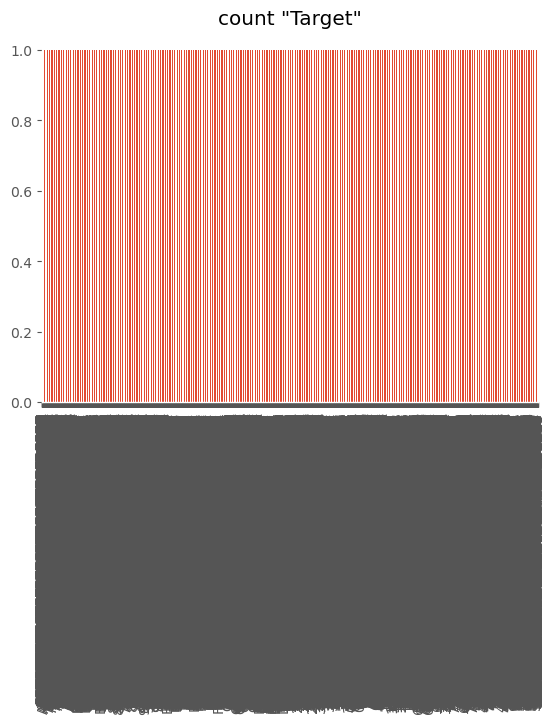

In [10]:
balance_data=pd.read_csv(path)
#balance_data
# balance_data=balance_data.drop(['Unnamed: 0'],axis=1)
balance_data
kWhs,labels=rus.fit_resample(kWhs,labels)
labels.value_counts().plot(kind='bar',title='count "Target"')

applying Kmeans-smote to balance data
last modified date: Feb 14 2023

In [11]:
import pandas as pd
from imblearn.combine import SMOTEENN

# Load the data from the CSV file
kmeans_df = balance_data.copy()

# Separate the features and the target variable
X = kmeans_df.drop(['FLAG','CONS_NO'], axis=1)  # replace 'target_column' with the name of your target column
y = kmeans_df['FLAG']
# Apply KMeans-SMOTE on the X data
kmeans_smote = SMOTEENN()

# X=X[0:4000]
# y=y[0:4000]


X_resampled, y_resampled = kmeans_smote.fit_resample(X, y)

# Concatenate the augmented X data with the original X data
balance_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

# Save the augmented dataset to a new CSV file
# augmented_df.to_csv('your_augmented_file.csv', index=False)


In [12]:
#kWhs = balance_data.iloc[:, 2:]  #seperate the features and the label
labels = balance_data.FLAG



In [13]:
balance_data_flag=balance_data.drop(['FLAG'],axis=1)
kWhs = balance_data_flag

<Axes: title={'center': 'count "Target"'}>

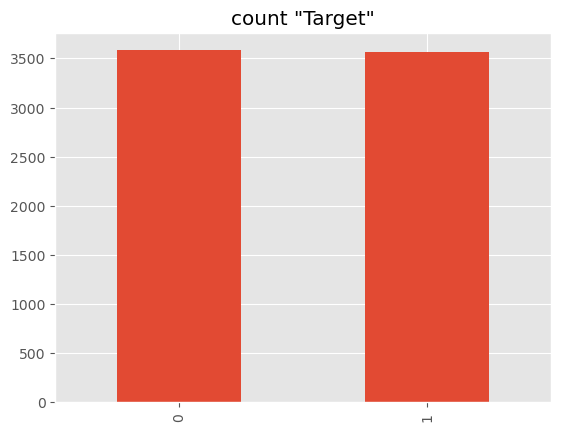

In [14]:
labels.value_counts().plot(kind='bar',title='count "Target"')

In [15]:
NUM_CONSUMERS, NUM_DAYS = kWhs.shape

print(NUM_CONSUMERS, NUM_DAYS)

7144 1035


Function to sacle data to try differant type of scaling and plote the data before and fter scaling

In [16]:

def scale_features(X=kWhs, scaling_strategy='Standard', plot_distributions=False):
  """Allows user to scale features for individual samples using specified scaling strategy.
  `Standard` - all features scaled to have mean 0, standard deviation of 1
  `MinMax` - all features scaled according to x - x_min / (x_max - x_min)
  `MaxAbs` - all features scaled according to x / abs(x_max)
  
  Returns matrix of scaled features as a numpy array.

  Also allows before/after plots of feature values to compare effect of scaling
  """
  # StandardScaler - all features will have mean of 0, and std deviation of 1
  if (scaling_strategy=='Standard'):
    # Instantiate a StandardScaler object
    scaler = StandardScaler()
  elif (scaling_strategy=='MinMax'):
    scaler = MinMaxScaler()
  elif (scaling_strategy=='MaxAbs'):
    scaler = MaxAbsScaler()

  # Make a copy of the features, transpose so that consumers become columns
  X_copy = X.copy().transpose()

  # Once consumers are in columns, scale each consumer using scaler object and retranspose results 
  # Retransposing ensures that in scaled data, the consumers are still rows
  X_scaled = scaler.fit_transform(X_copy).transpose() # THIS IS A NUMPY ARRAY, NOT A DATAFRAME

  # If the user has asked to compare distributions
  if plot_distributions:
    # First figure - before scaling
    plt.figure(figsize=(12, 6))
    distplot(X.values.ravel(), kde=False, hist_kws=dict(edgecolor='k', linewidth=2))
    plt.xlabel('Unscaled kWh Values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('kWh Values - Before Scaling', fontsize=18)

    # Second figure - after scaling
    plt.figure(figsize=(12, 6))
    distplot(X_scaled.ravel(), kde=False, hist_kws=dict(edgecolor='k', linewidth=2))
    plt.xlabel('Scaled kWh Values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('kWh Values - After {} Scaling'.format(scaling_strategy), fontsize=18)

  # Return the scaled features
  return X_scaled

C:\Users\hp\AppData\Local\Temp\ipykernel_10632\1459490884.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  distplot(X.values.ravel(), kde=False, hist_kws=dict(edgecolor='k', linewidth=2))
C:\Users\hp\AppData\Local\Temp\ipykernel_10632\1459490884.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  distplot(X_scaled.r

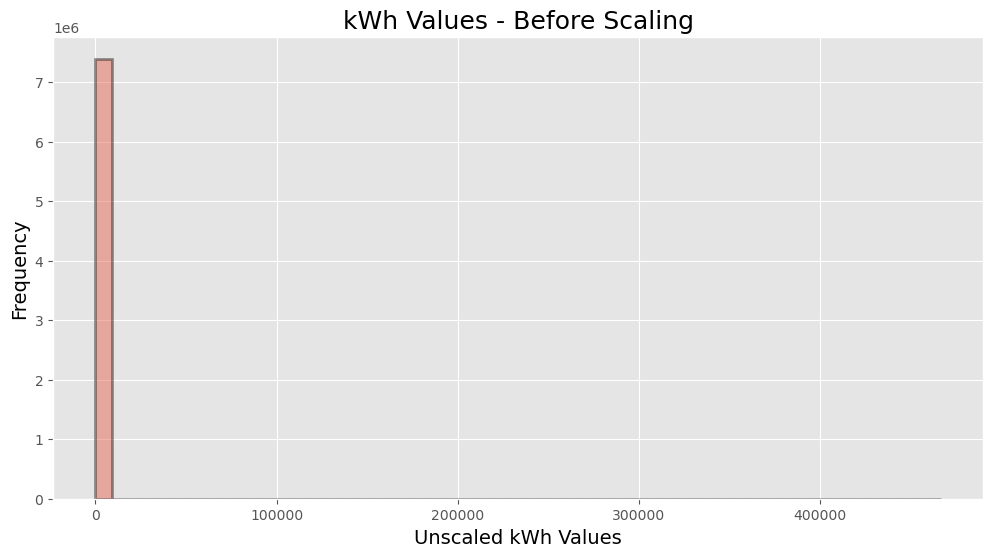

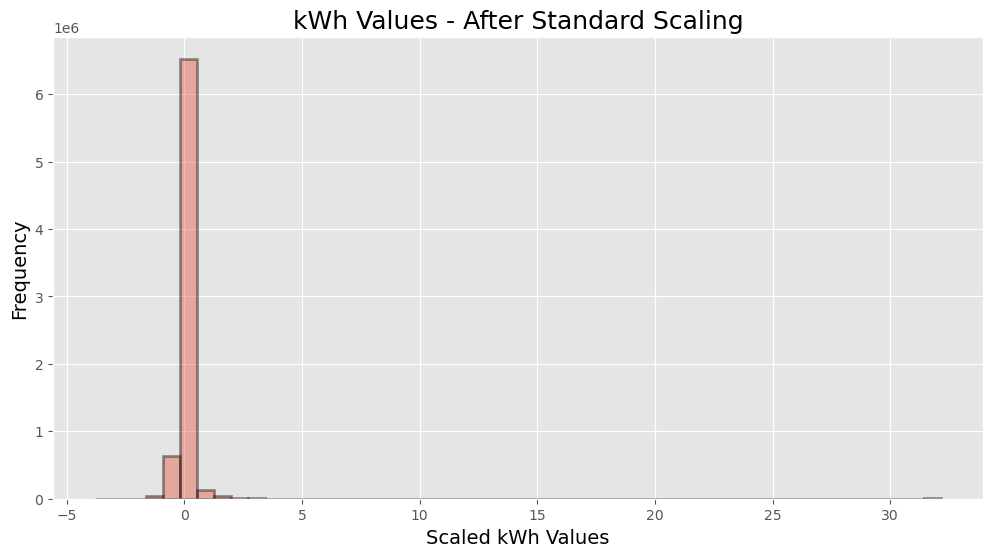

In [17]:
X_scaled_std = scale_features(X=kWhs,scaling_strategy='Standard', plot_distributions=True)

In [19]:
# Printing dimension of datatset for padding
import numpy as np
NUM_DAYS = 980
DAYS_PER_WEEK = 7
NUM_WEEKS_FLOAT = NUM_DAYS / DAYS_PER_WEEK 
NUM_WEEKS = int(np.ceil(NUM_WEEKS_FLOAT))
print(f"Number of days per dataset: {NUM_DAYS}.\nNumber of days per week: {DAYS_PER_WEEK}")
print(f"So exact number of weeks: {NUM_WEEKS_FLOAT}\nWhich, when rounded up is {NUM_WEEKS}")
print(f"Which means new number of days is: {NUM_WEEKS * DAYS_PER_WEEK}")
print(f"Extra days to add: {NUM_WEEKS * DAYS_PER_WEEK - NUM_DAYS}")

Number of days per dataset: 980.
Number of days per week: 7
So exact number of weeks: 140.0
Which, when rounded up is 140
Which means new number of days is: 980
Extra days to add: 0


In [32]:
# 2 extra days per consumer 
X_scaled_std[:,0:980]
X_scaled_std_padded = np.append(X_scaled_std, np.zeros((NUM_CONSUMERS, 0)), 
                                axis=1)
X_scaled_std_padded.shape

(7144, 1035)

In [33]:
# Are the last two columns (and only the last two columns) zero
X_scaled_std_padded=X_scaled_std_padded[:,0:980]

pd.DataFrame(X_scaled_std_padded)

,0,1,2,3,4,5,6,7,8,9,...,970,971,972,973,974,975,976,977,978,979
0,32.084683,-0.096750,-0.015385,-0.096750,-0.004181,-0.096750,-0.096750,-0.096750,0.004889,-0.096750,...,0.338264,0.197764,0.158727,0.149924,0.208969,0.254942,0.206212,0.223108,0.224708,0.094080
1,32.133030,-0.043242,-0.030539,-0.042887,-0.037468,-0.053459,-0.050971,-0.036846,-0.062964,-0.049728,...,-0.031249,0.099874,-0.026452,-0.008774,-0.037113,-0.048129,0.000021,0.045417,0.014857,0.024007
2,32.126846,-0.028414,0.020391,-0.000019,-0.014926,-0.007295,0.021100,0.010985,0.022698,-0.001705,...,-0.014660,-0.024864,-0.003213,-0.006585,-0.023622,-0.016701,-0.018919,-0.011288,-0.017411,-0.018387
3,32.151306,-0.037628,-0.037628,-0.037628,-0.037628,-0.037628,-0.037628,-0.037628,-0.037628,-0.037628,...,-0.023452,-0.023275,-0.021060,-0.023718,-0.023807,-0.023984,-0.021503,-0.023807,-0.023984,-0.023807
4,32.126535,0.024770,0.014049,0.011656,0.022821,0.016796,0.007137,0.013251,0.015378,0.016618,...,-0.071280,-0.071457,-0.071546,-0.071369,-0.071812,-0.071103,-0.071369,-0.073407,-0.071635,-0.071192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,23.816906,-0.419539,-0.419539,-0.419539,-0.419539,-0.419539,-0.419539,-0.419539,-0.419539,-0.419539,...,0.785879,0.702282,1.314429,1.255102,1.122964,1.309035,1.079817,0.656438,0.721158,1.252405
7140,32.109441,-0.062531,-0.062531,-0.062531,-0.062531,-0.062531,-0.062531,-0.062531,-0.062531,-0.062531,...,0.010254,0.042265,0.027779,0.009270,0.013473,0.007482,0.017496,0.012936,0.026974,0.010969
7141,27.018249,-0.347509,-0.347509,-0.347509,-0.347509,-0.347509,-0.347509,-0.347509,-0.347509,-0.347509,...,1.111189,0.899398,0.865694,0.889150,1.224751,1.271740,1.254660,1.278723,1.222398,1.247600
7142,32.095221,-0.060419,-0.060419,-0.060419,-0.060419,-0.060419,-0.060419,-0.060419,-0.060419,-0.060419,...,0.041692,0.043206,0.033858,0.082109,0.082999,0.062613,0.081219,0.095018,0.124663,0.124841


In [34]:
# Creating a new numpy array to store the training data
X_reshaped = np.zeros((NUM_CONSUMERS, NUM_WEEKS, DAYS_PER_WEEK,1))


In [35]:
X_scaled_std_padded[0].reshape(NUM_WEEKS, DAYS_PER_WEEK, 1)

array([[[ 3.20846832e+01],
        [-9.67503714e-02],
        [-1.53853210e-02],
        [-9.67503714e-02],
        [-4.18095345e-03],
        [-9.67503714e-02],
        [-9.67503714e-02]],

       [[-9.67503714e-02],
        [ 4.88924888e-03],
        [-9.67503714e-02],
        [-9.67503714e-02],
        [ 6.58908058e-02],
        [ 1.33369863e-02],
        [-3.55848859e-03]],

       [[ 5.04181077e-02],
        [-9.67503714e-02],
        [-9.67503714e-02],
        [-9.67503714e-02],
        [-1.24647623e-03],
        [-2.04539635e-02],
        [-2.93602372e-03]],

       [[-9.67503714e-02],
        [-4.31294694e-02],
        [-6.04695621e-02],
        [-5.18439775e-02],
        [-9.67503714e-02],
        [-6.01138679e-02],
        [-9.67503714e-02]],

       [[-5.65569258e-02],
        [-9.67503714e-02],
        [-2.91684717e-02],
        [-9.67503714e-02],
        [-9.67503714e-02],
        [-9.67503714e-02],
        [-9.67503714e-02]],

       [[-9.67503714e-02],
        [-9.675037

In [36]:
def transform_daily_to_weekly(daily_kWhs):
  """Will simply reshape the 1D daily kWhs of a single consumer into 2D weekly data""" 
  return daily_kWhs.reshape(NUM_WEEKS, DAYS_PER_WEEK, 1)

In [37]:
# Applying this function to every consumer in the original dataset
# And saving the (148, 7) kWhs matrix for that consumer at the ith index in 3D array
for i in range(0, NUM_CONSUMERS):
  X_reshaped[i] = transform_daily_to_weekly(X_scaled_std_padded[i])

In [38]:
print(X_reshaped.shape)
X_reshaped[0]

(7144, 140, 7, 1)


array([[[ 3.20846832e+01],
        [-9.67503714e-02],
        [-1.53853210e-02],
        [-9.67503714e-02],
        [-4.18095345e-03],
        [-9.67503714e-02],
        [-9.67503714e-02]],

       [[-9.67503714e-02],
        [ 4.88924888e-03],
        [-9.67503714e-02],
        [-9.67503714e-02],
        [ 6.58908058e-02],
        [ 1.33369863e-02],
        [-3.55848859e-03]],

       [[ 5.04181077e-02],
        [-9.67503714e-02],
        [-9.67503714e-02],
        [-9.67503714e-02],
        [-1.24647623e-03],
        [-2.04539635e-02],
        [-2.93602372e-03]],

       [[-9.67503714e-02],
        [-4.31294694e-02],
        [-6.04695621e-02],
        [-5.18439775e-02],
        [-9.67503714e-02],
        [-6.01138679e-02],
        [-9.67503714e-02]],

       [[-5.65569258e-02],
        [-9.67503714e-02],
        [-2.91684717e-02],
        [-9.67503714e-02],
        [-9.67503714e-02],
        [-9.67503714e-02],
        [-9.67503714e-02]],

       [[-9.67503714e-02],
        [-9.675037

In [39]:
print(X_reshaped.shape)
labels = np.asarray(labels)

(7144, 140, 7, 1)


In [40]:
print(labels.shape)

(7144,)


In [41]:


X_train, X_test, y_train, y_test= train_test_split(X_reshaped,labels,
                                                    test_size=0.2 
                                                    )




In [42]:
y_train

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [43]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(5715, 140, 7, 1) (1429, 140, 7, 1) (5715,) (1429,)


In [104]:
# print(y_test) 
# rus = RandomUnderSampler(random_state=42)
# x_res, y_res = rus.fit_resample(X_test,y_test)
# print(sum(y_res == 0))
# print(sum(y_res == 1))
# np.count_nonzero(y_test==1)
# #np.count_nonzero(y_train==)
 

[0 0 0 ... 1 0 1]


ValueError: Found array with dim 4. RandomUnderSampler expected <= 2.

In [100]:
count = 0
y_test1 = []
x_test1 = []

for i in range(len(y_test)):
    #print(index, value)
    if y_test[i] == 0:
        print(i, y_test[i])
        count += 1
        y_test1.append(y_test[i])
        x_test1.append(X_test[i])
        #if count >= 692:
            
             

0 0
1 0
2 0
3 0
4 0
5 0
7 0
8 0
9 0
10 0
13 0
17 0
19 0
20 0
21 0
22 0
23 0
24 0
28 0
29 0
31 0
32 0
34 0
35 0
39 0
40 0
41 0
46 0
47 0
49 0
50 0
51 0
55 0
56 0
60 0
63 0
64 0
65 0
66 0
68 0
71 0
72 0
74 0
75 0
76 0
79 0
80 0
81 0
83 0
85 0
86 0
87 0
88 0
89 0
91 0
92 0
93 0
94 0
98 0
99 0
101 0
103 0
105 0
107 0
108 0
109 0
110 0
112 0
114 0
116 0
119 0
121 0
122 0
127 0
128 0
130 0
131 0
132 0
135 0
136 0
138 0
139 0
141 0
144 0
145 0
147 0
148 0
149 0
151 0
154 0
155 0
158 0
160 0
169 0
170 0
173 0
174 0
176 0
177 0
180 0
182 0
183 0
185 0
189 0
190 0
191 0
193 0
195 0
196 0
198 0
203 0
206 0
208 0
210 0
211 0
213 0
216 0
218 0
219 0
220 0
221 0
225 0
230 0
234 0
235 0
236 0
237 0
238 0
240 0
243 0
245 0
246 0
252 0
253 0
254 0
255 0
257 0
258 0
259 0
260 0
261 0
262 0
264 0
266 0
267 0
268 0
269 0
270 0
280 0
282 0
283 0
285 0
286 0
288 0
289 0
292 0
293 0
295 0
299 0
300 0
301 0
302 0
303 0
305 0
306 0
307 0
308 0
309 0
311 0
314 0
315 0
317 0
319 0
320 0
321 0
323 0
324 0
325 0
3

In [99]:
np.count_nonzero(y_test1==0)


0

**MLP-GRU**

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.regularizers import l1_l2
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
#TODO LIST 92. AUC


def create_mlp_gru_model(input_shape, num_classes):
    # MLP Input layer
    mlp_input = Input(shape=(input_shape[1],), name='mlp_input')
    # MLP Hidden Layers with Dropout
    x = Dense(128, activation='relu', kernel_regularizer=l1_l2(0.01))(mlp_input) #0.01
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu', kernel_regularizer=l1_l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    # GRU Input layer
    gru_input = Input(shape=input_shape[1:], name='gru_input')
    # GRU Layers

    gru_input = tf.keras.layers.Reshape((140, 7))(gru_input)

    y = GRU(64, return_sequences=True)(gru_input)
    y = GRU(32)(y)
    # Concatenate MLP and GRU outputs
    combined = Concatenate()([x, y])
    # Output Layer
    output = Dense(1, activation='sigmoid')(combined)
    # Combine the Inputs and Output into a Model
    model = Model(inputs=[mlp_input, gru_input], outputs=output)
    # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])
    model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy', tf.keras.metrics.AUC()])
    
    
    return model

# Define the Model
model = create_mlp_gru_model(X_train.shape, num_classes=2)
# mlp_gru = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = create_mlp_gru_model)
# parameters = {'optimizer':['adam','adammax','SGD'],  
#               'epochs' : [65,25,20,20],
#               'batch_size': [25,32]}

# grid_search = GridSearchCV(estimator=mlp_gru,
#                            param_grid=parameters,
#                            scoring= 'accuracy',
#                            cv=10)

# grid_search = grid_search.fit(X, y)

history=model.fit([X_train[:,:,0], X_train], y_train, epochs=60, batch_size=32, validation_data=([X_test[:,:,0], X_test], y_test))
# keras_clf = KerasClassifier(model = model, optimizer="adammax", epochs=100, verbose=0)


# Train the Model


Epoch 1/60
179/179 [==============================] - 27s 122ms/step - loss: 8.5429 - accuracy: 0.7409 - auc: 0.7908 - val_loss: 2.5874 - val_accuracy: 0.5059 - val_auc: 0.6376
Epoch 2/60
179/179 [==============================] - 22s 123ms/step - loss: 1.3204 - accuracy: 0.7270 - auc: 0.7888 - val_loss: 1.3467 - val_accuracy: 0.4843 - val_auc: 0.7722
Epoch 3/60
179/179 [==============================] - 22s 123ms/step - loss: 0.8743 - accuracy: 0.7570 - auc: 0.8071 - val_loss: 0.8927 - val_accuracy: 0.6648 - val_auc: 0.8001
Epoch 4/60
179/179 [==============================] - 23s 128ms/step - loss: 0.7491 - accuracy: 0.7701 - auc: 0.8255 - val_loss: 0.9265 - val_accuracy: 0.6697 - val_auc: 0.8415
Epoch 5/60
179/179 [==============================] - 22s 121ms/step - loss: 0.6469 - accuracy: 0.7928 - auc: 0.8545 - val_loss: 0.9911 - val_accuracy: 0.7054 - val_auc: 0.8572
Epoch 6/60
179/179 [==============================] - 22s 125ms/step - loss: 0.5661 - accuracy: 0.8212 - auc: 0.879

179/179 [==============================] - 20s 111ms/step - loss: 0.4505 - accuracy: 0.8665 - auc: 0.9315 - val_loss: 0.5203 - val_accuracy: 0.8376 - val_auc: 0.9017
Epoch 48/60
179/179 [==============================] - 20s 112ms/step - loss: 0.4497 - accuracy: 0.8686 - auc: 0.9312 - val_loss: 0.5298 - val_accuracy: 0.8321 - val_auc: 0.8937
Epoch 49/60
179/179 [==============================] - 20s 112ms/step - loss: 0.4485 - accuracy: 0.8698 - auc: 0.9312 - val_loss: 0.5197 - val_accuracy: 0.8404 - val_auc: 0.9016
Epoch 50/60
179/179 [==============================] - 20s 111ms/step - loss: 0.4474 - accuracy: 0.8675 - auc: 0.9321 - val_loss: 0.5221 - val_accuracy: 0.8328 - val_auc: 0.8975
Epoch 51/60
179/179 [==============================] - 20s 111ms/step - loss: 0.4447 - accuracy: 0.8702 - auc: 0.9335 - val_loss: 0.5219 - val_accuracy: 0.8390 - val_auc: 0.8991
Epoch 52/60
179/179 [==============================] - 20s 111ms/step - loss: 0.4450 - accuracy: 0.8702 - auc: 0.9332 - va

In [46]:
parameters = {'Optimizer':['adam','adammax','SGD'], 
              'Dropout':[0.3,0.2,0.5,0.01,0.1], 
              'activation':['relu','elu','sigmoid',''],
              'Epochs' : [15,25,20,20]}

In [47]:
predictions = model.predict([X_test[:,:,0], X_test])
predictions = [1 if p>0.5 else 0 for p in predictions]
model.save_weights("./MLP-GRU_Weights")

45/45 [==============================] - 2s 30ms/step


In [48]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, f1_score

# F-Measure
precision = tf.keras.metrics.Precision()
print(precision)


f1 = f1_score(y_test, predictions)
mcc = matthews_corrcoef(y_test, predictions)
print("F1-Score:", f1)
print("Matthews Correlation Coefficient:", mcc)

print(classification_report(y_test, predictions))

Precision(name=precision,dtype=float32,thresholds=None,top_k=None,class_id=None)
F1-Score: 0.8203957382039575
Matthews Correlation Coefficient: 0.6716044579153494
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       737
           1       0.87      0.78      0.82       692

    accuracy                           0.83      1429
   macro avg       0.84      0.83      0.83      1429
weighted avg       0.84      0.83      0.83      1429



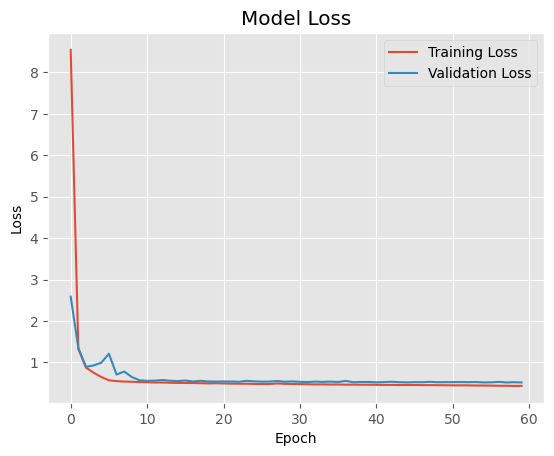

<Figure size 640x480 with 0 Axes>

In [49]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('result_epoch.png')

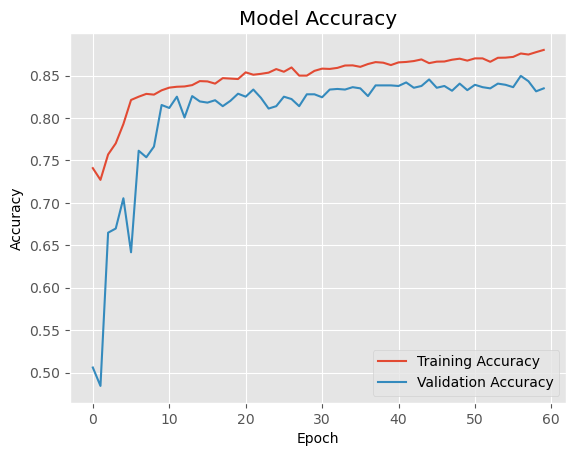

<Figure size 640x480 with 0 Axes>

In [50]:
# Plot the training and validation loss

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('result.png')

**EVALUATION OF THE MODEL**



In [51]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import f1_score

Text(0.5, 1.0, 'Confusion Matrix  - MLP-GRU')

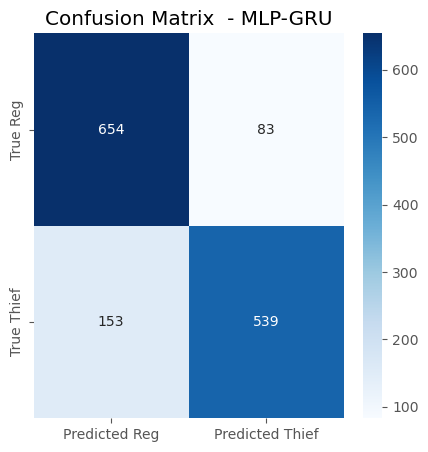

In [52]:
# Using Seaborn to plot confusion matrix as a heatmap 
conf_mat = confusion_matrix(y_test, predictions)

# Create a heatmap in lieu of the plot_confusion_matrix call in sklearn
plt.figure(figsize=(5, 5))
heatmap(conf_mat, annot=True, fmt='.5g', cmap='Blues', 
      xticklabels=['Predicted Reg', 'Predicted Thief'], 
      yticklabels=['True Reg', 'True Thief'])

model_name = "MLP-GRU"
plt.title('Confusion Matrix ' + ('' if model_name is None else ' - ' + model_name))


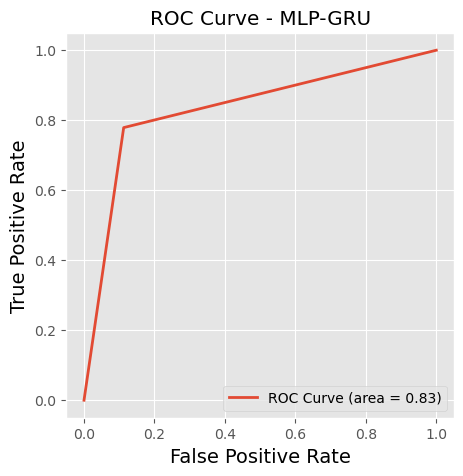

In [53]:
# ROC Curve
plt.figure(figsize=(5, 5))
fpr, tpr, _ = roc_curve(y_test, predictions, pos_label=1)
roc_auc = roc_auc_score(y_test, predictions)
plt.plot(fpr, tpr, lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve' + ('' if model_name is None else (' - ' + model_name)))
plt.legend(loc='lower right')

0.8665594855305466
0.8203957382039575
0.7789017341040463


<BarContainer object of 3 artists>

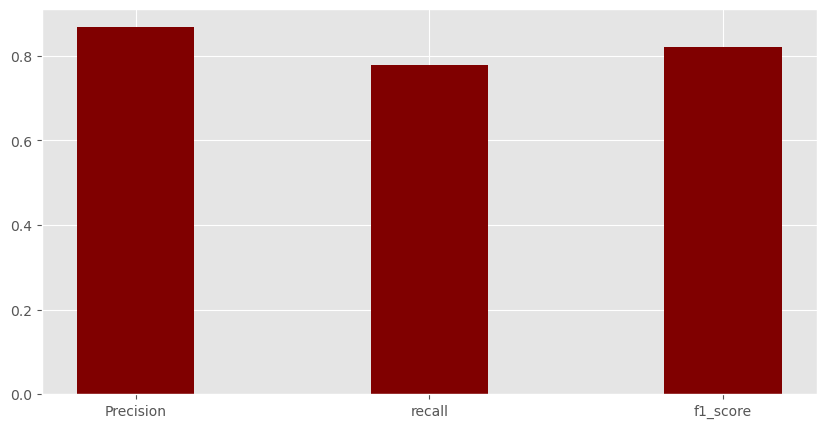

In [54]:
#bar graph
precision=precision_score(y_test,predictions)
recall=recall_score(y_test,predictions)
f1=f1_score(y_test,predictions)
print(precision) 
print(f1)
print(recall)

data = {'Precision':precision, 'recall':recall, 'f1_score':f1}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
      width = 0.4)

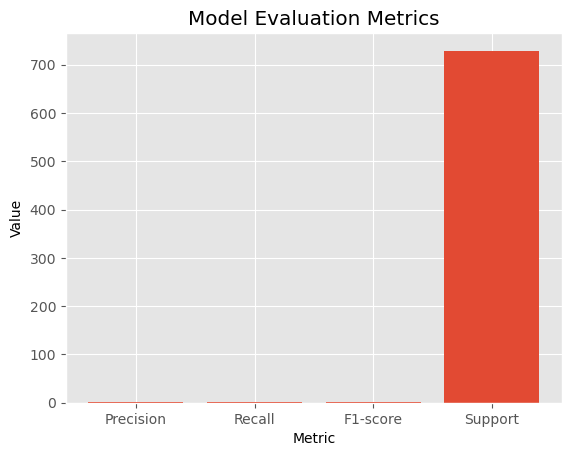

In [70]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, predictions)

# Plot the precision, recall, F1-score, and support on a bar chart
labels = ['Precision', 'Recall', 'F1-score', 'Support']
values = [precision[1], recall[1], f1_score[1], support[1]]
plt.bar(labels, values)
plt.title('Model Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()